In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
!rm bank*
!ls -la

total 680
drwxr-xr-x  10 vladflore  staff     320 Oct 13 16:06 .
drwxr-xr-x   6 vladflore  staff     192 Sep 16 18:03 ..
drwxr-xr-x  14 vladflore  staff     448 Oct 13 15:13 .git
-rw-r--r--   1 vladflore  staff      19 Sep 16 21:55 .gitignore
drwxr-xr-x   6 vladflore  staff     192 Oct 10 18:14 .ipynb_checkpoints
drwxr-xr-x   6 vladflore  staff     192 Oct  7 12:06 .mypy_cache
-rw-r--r--   1 vladflore  staff    5736 Sep 25 23:01 01-intro-hw.ipynb
-rw-r--r--   1 vladflore  staff  114677 Oct  8 11:37 02-regression-hw.ipynb
-rw-r--r--   1 vladflore  staff  213539 Oct 13 16:05 03-classification-hw.ipynb
-rw-r--r--   1 vladflore  staff      40 Sep 16 18:06 README.md


In [3]:
zip_url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
!wget $zip_url

--2024-10-13 16:06:40--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [         <=>        ] 999.85K   574KB/s    in 1.7s    

2024-10-13 16:06:43 (574 KB/s) - ‘bank+marketing.zip’ saved [1023843]



In [4]:
!unzip bank+marketing.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [5]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [6]:
data = 'bank-full.csv'
df = pd.read_csv(data, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
for col in df.columns.to_list():
    print(col)
    print()
    print(df[col].unique())
    print()

age

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital

['married' 'single' 'divorced']

education

['tertiary' 'secondary' 'unknown' 'primary']

default

['no' 'yes']

balance

[ 2143    29     2 ...  8205 14204 16353]

housing

['yes' 'no']

loan

['no' 'yes']

contact

['unknown' 'cellular' 'telephone']

day

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration

[ 261  151   76 ... 1298 1246 1556]

campaign

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 3

In [8]:
features_string = """
age,
job,
marital,
education,
balance,
housing,
contact,
day,
month,
duration,
campaign,
pdays,
previous,
poutcome,
y
"""
features = [f.strip() for f in features_string.split(',')]

In [9]:
df.shape

(45211, 17)

In [10]:
df = df[features]
df.shape

(45211, 15)

In [11]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.education.mode().values

array(['secondary'], dtype=object)

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
df_for_corr = df.select_dtypes(include='int64')
df_for_corr

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [16]:
corr_matrix = df_for_corr.corr()
pairs = corr_matrix.unstack()
pairs = pairs[pairs < 1].abs().sort_values(ascending=False)
pairs.head(1).index

MultiIndex([('previous', 'pdays')],
           )

Text(0.5, 1.0, 'Correlation Matrix')

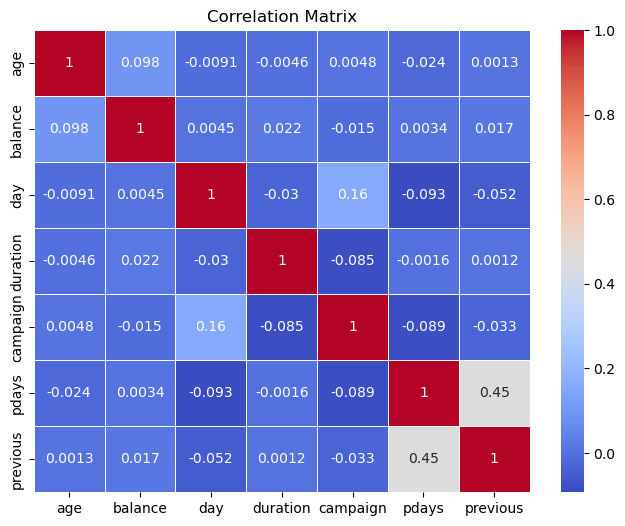

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [18]:
df.y = (df.y == 'yes').astype(int)
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [20]:
global_y = df.y.mean()
global_y

0.11698480458295547

In [21]:
numerical_features = set(df.select_dtypes(include='int64').columns.to_list())
categorical_features = set(df.columns.to_list()).difference(numerical_features)
numerical_features, categorical_features

({'age', 'balance', 'campaign', 'day', 'duration', 'pdays', 'previous', 'y'},
 {'contact', 'education', 'housing', 'job', 'marital', 'month', 'poutcome'})

In [22]:
for cat_feat in categorical_features:
    res = df.groupby(by=cat_feat).y.agg(['mean'])
    res['diff'] = res['mean'] - global_y
    res['risk'] = res['mean'] / global_y
    display.display(res)

,mean,diff,risk
education,,,
primary,0.086265,-0.030720,0.737402
secondary,0.105594,-0.011390,0.902633
tertiary,0.150064,0.033079,1.282764
unknown,0.135703,0.018718,1.160003


,mean,diff,risk
housing,,,
no,0.167024,0.050039,1.427737
yes,0.077000,-0.039985,0.658202


,mean,diff,risk
month,,,
apr,0.196794,0.079809,1.682218
aug,0.110133,-0.006852,0.941429
dec,0.467290,0.350305,3.994448
feb,0.166478,0.049493,1.423073
jan,0.101212,-0.015773,0.865170
jul,0.090935,-0.026049,0.777327
jun,0.102228,-0.014757,0.873857
mar,0.519916,0.402931,4.444305
may,0.067195,-0.049790,0.574387


,mean,diff,risk
contact,,,
cellular,0.149189,0.032204,1.275285
telephone,0.134205,0.017220,1.147201
unknown,0.040707,-0.076278,0.347965


,mean,diff,risk
marital,,,
divorced,0.119455,0.002470,1.021112
married,0.101235,-0.015750,0.865366
single,0.149492,0.032507,1.277874


,mean,diff,risk
poutcome,,,
failure,0.126097,0.009112,1.077890
other,0.166848,0.049863,1.426235
success,0.647253,0.530269,5.532800
unknown,0.091615,-0.025370,0.783136


,mean,diff,risk
job,,,
admin.,0.122027,0.005042,1.043099
blue-collar,0.072750,-0.044235,0.621873
entrepreneur,0.082717,-0.034268,0.707074
housemaid,0.087903,-0.029082,0.751407
management,0.137556,0.020571,1.175841
retired,0.227915,0.110930,1.948246
self-employed,0.118429,0.001445,1.012348
services,0.088830,-0.028155,0.759330
student,0.286780,0.169796,2.451433


In [23]:
df_train, df_remaining = train_test_split(df, test_size=0.4, random_state=42)

df_val, df_test = train_test_split(df_remaining, test_size=0.5, random_state=42)

df.shape[0], df_train.shape[0] + df_val.shape[0] + df_test.shape[0]

(45211, 45211)

In [24]:
df_train = df_train.reset_index(drop=True)
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,entrepreneur,married,primary,-100,yes,unknown,27,may,240,6,-1,0,unknown,0
1,29,services,single,secondary,166,no,cellular,28,jul,108,8,-1,0,unknown,0
2,31,admin.,single,secondary,121,yes,unknown,20,may,187,1,-1,0,unknown,0
3,40,self-employed,single,tertiary,1693,yes,cellular,17,nov,353,1,-1,0,unknown,0
4,28,services,single,secondary,317,yes,unknown,16,may,21,3,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,44,housemaid,single,primary,1059,no,unknown,18,jun,2093,1,-1,0,unknown,1
27122,23,student,single,tertiary,508,no,cellular,8,sep,210,1,92,1,failure,0
27123,34,technician,divorced,tertiary,1317,yes,cellular,15,may,239,1,-1,0,unknown,0
27124,33,retired,married,secondary,165,no,unknown,7,may,111,1,-1,0,unknown,0


In [25]:
df_val = df_val.reset_index(drop=True)
df_val

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36,management,married,secondary,565,no,cellular,27,mar,300,1,-1,0,unknown,1
1,25,blue-collar,single,primary,-221,yes,unknown,23,may,250,1,-1,0,unknown,0
2,35,management,single,tertiary,1162,no,cellular,30,apr,175,1,-1,0,unknown,1
3,56,self-employed,married,tertiary,0,no,cellular,19,nov,122,1,-1,0,unknown,0
4,45,blue-collar,married,primary,101,yes,unknown,12,may,460,5,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,22,technician,single,secondary,283,yes,cellular,22,mar,254,2,-1,0,unknown,1
9038,49,management,married,tertiary,391,no,unknown,17,jun,128,1,-1,0,unknown,0
9039,37,entrepreneur,married,secondary,3,no,cellular,20,nov,96,1,-1,0,unknown,0
9040,33,blue-collar,married,primary,217,yes,cellular,20,apr,198,1,339,3,failure,0


In [26]:
df_test = df_test.reset_index(drop=True)
df_test

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29,blue-collar,married,secondary,2,yes,cellular,22,jul,96,1,-1,0,unknown,0
1,50,unknown,married,primary,341,yes,cellular,20,apr,670,4,340,2,success,1
2,34,management,single,tertiary,171,yes,cellular,7,may,191,1,294,1,failure,0
3,41,housemaid,married,tertiary,783,yes,unknown,30,may,130,2,-1,0,unknown,0
4,31,management,married,tertiary,557,yes,cellular,18,jul,111,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,37,entrepreneur,married,tertiary,41,no,cellular,14,jul,388,3,-1,0,unknown,0
9039,35,technician,married,secondary,294,yes,cellular,9,mar,301,1,90,4,success,1
9040,38,admin.,married,secondary,0,yes,telephone,16,jul,264,5,-1,0,unknown,0
9041,43,entrepreneur,single,tertiary,0,yes,unknown,26,may,142,3,-1,0,unknown,0


In [27]:
y_train = df_train.y.values
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
y_val = df_val.y.values
y_val

array([1, 0, 1, ..., 0, 0, 0])

In [29]:
y_test = df_test.y.values
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [30]:
del df_train['y']
del df_val['y']
del df_test['y']

In [31]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45,entrepreneur,married,primary,-100,yes,unknown,27,may,240,6,-1,0,unknown
1,29,services,single,secondary,166,no,cellular,28,jul,108,8,-1,0,unknown
2,31,admin.,single,secondary,121,yes,unknown,20,may,187,1,-1,0,unknown
3,40,self-employed,single,tertiary,1693,yes,cellular,17,nov,353,1,-1,0,unknown
4,28,services,single,secondary,317,yes,unknown,16,may,21,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,44,housemaid,single,primary,1059,no,unknown,18,jun,2093,1,-1,0,unknown
27122,23,student,single,tertiary,508,no,cellular,8,sep,210,1,92,1,failure
27123,34,technician,divorced,tertiary,1317,yes,cellular,15,may,239,1,-1,0,unknown
27124,33,retired,married,secondary,165,no,unknown,7,may,111,1,-1,0,unknown


In [32]:
df_val

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,36,management,married,secondary,565,no,cellular,27,mar,300,1,-1,0,unknown
1,25,blue-collar,single,primary,-221,yes,unknown,23,may,250,1,-1,0,unknown
2,35,management,single,tertiary,1162,no,cellular,30,apr,175,1,-1,0,unknown
3,56,self-employed,married,tertiary,0,no,cellular,19,nov,122,1,-1,0,unknown
4,45,blue-collar,married,primary,101,yes,unknown,12,may,460,5,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,22,technician,single,secondary,283,yes,cellular,22,mar,254,2,-1,0,unknown
9038,49,management,married,tertiary,391,no,unknown,17,jun,128,1,-1,0,unknown
9039,37,entrepreneur,married,secondary,3,no,cellular,20,nov,96,1,-1,0,unknown
9040,33,blue-collar,married,primary,217,yes,cellular,20,apr,198,1,339,3,failure


In [33]:
df_test

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,29,blue-collar,married,secondary,2,yes,cellular,22,jul,96,1,-1,0,unknown
1,50,unknown,married,primary,341,yes,cellular,20,apr,670,4,340,2,success
2,34,management,single,tertiary,171,yes,cellular,7,may,191,1,294,1,failure
3,41,housemaid,married,tertiary,783,yes,unknown,30,may,130,2,-1,0,unknown
4,31,management,married,tertiary,557,yes,cellular,18,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,37,entrepreneur,married,tertiary,41,no,cellular,14,jul,388,3,-1,0,unknown
9039,35,technician,married,secondary,294,yes,cellular,9,mar,301,1,90,4,success
9040,38,admin.,married,secondary,0,yes,telephone,16,jul,264,5,-1,0,unknown
9041,43,entrepreneur,single,tertiary,0,yes,unknown,26,may,142,3,-1,0,unknown


In [35]:
numerical_features.difference_update({'y'})
numerical_features = list(numerical_features)
numerical_features

['balance', 'previous', 'pdays', 'campaign', 'age', 'day', 'duration']

In [36]:
categorical_features = list(categorical_features)
categorical_features

['education', 'housing', 'month', 'contact', 'marital', 'poutcome', 'job']

In [37]:
df_train[categorical_features].nunique()

education     4
housing       2
month        12
contact       3
marital       3
poutcome      4
job          12
dtype: int64

In [38]:
df_train_mi = df_train[categorical_features].apply(lambda s: mutual_info_score(s, y_train))
display.display(df_train_mi)

df_train_mi.sort_values(ascending=False).round(2).index[0]

education    0.002570
housing      0.009464
month        0.024780
contact      0.014214
marital      0.002201
poutcome     0.029403
job          0.007910
dtype: float64

'poutcome'

In [39]:
dict_train = df_train[numerical_features+categorical_features].to_dict(orient='records')

In [40]:
dict_val = df_val[numerical_features+categorical_features].to_dict(orient='records')

In [41]:
dv = DictVectorizer(sparse=False)
dv.fit(dict_train)
X_train = dv.transform(dict_train)
X_train

array([[ 4.500e+01, -1.000e+02,  6.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 2.900e+01,  1.660e+02,  8.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.100e+01,  1.210e+02,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [ 3.400e+01,  1.317e+03,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.300e+01,  1.650e+02,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.800e+01, -4.100e+01,  1.000e+01, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [42]:
dv = DictVectorizer(sparse=False)
dv.fit(dict_val)
X_val = dv.transform(dict_val)
X_val

array([[ 3.600e+01,  5.650e+02,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 2.500e+01, -2.210e+02,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.500e+01,  1.162e+03,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       ...,
       [ 3.700e+01,  3.000e+00,  1.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00],
       [ 3.300e+01,  2.170e+02,  1.000e+00, ...,  0.000e+00,  0.000e+00,
         3.000e+00],
       [ 4.600e+01,  4.917e+03,  2.000e+00, ...,  0.000e+00,  1.000e+00,
         0.000e+00]])

In [43]:
X_train.shape, df_train[categorical_features].nunique().values.sum() + len(numerical_features)

((27126, 47), 47)

In [44]:
X_val.shape, df_val[categorical_features].nunique().values.sum() + len(numerical_features)

((9042, 47), 47)

In [45]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [46]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [47]:
w0 = model.intercept_[0]
w0

-1.021934214818996

In [48]:
w = model.coef_[0]
w

array([ 1.16530336e-03,  8.68947991e-06, -9.07149957e-02,  2.45167896e-01,
        1.61851005e-01, -1.42895312e+00,  7.50102964e-03,  4.20656883e-03,
       -5.09491343e-01, -2.51382669e-01, -4.28224393e-02, -2.18237763e-01,
       -1.75031766e-01, -8.46902449e-01,  2.16646583e-02, -1.85914998e-01,
       -2.72682119e-01, -2.93889910e-01, -1.23510282e-01,  3.48945699e-01,
       -2.86767832e-01, -2.21743727e-01,  3.52129948e-01, -1.41626573e-01,
       -8.53723549e-02, -1.33166725e-01, -2.67718523e-01, -5.62137227e-01,
       -1.92078464e-01,  5.57423092e-03, -8.01944618e-01,  3.04299132e-01,
       -2.86860245e-01, -1.08509990e+00, -1.03415229e+00,  3.47930517e-01,
        1.17655978e+00, -4.63274259e-01, -9.94475511e-01,  1.06257622e+00,
        7.46932725e-01, -1.76289161e-04, -8.26027231e-01, -7.20306504e-01,
        1.43098910e+00, -9.06589576e-01,  2.87787142e-02])

In [49]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.45065172, 0.01219693, 0.21590358, ..., 0.03129171, 0.0605091 ,
       0.02125205])

In [50]:
y_decission = y_pred >= 0.5
y_decission

array([False, False, False, ..., False, False, False])

In [51]:
round((y_val == y_decission).mean(), 2)

0.9

In [52]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = y_decission.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred[:25]

,probability,prediction,actual,correct
0,0.450652,0,1,False
1,0.012197,0,0,True
2,0.215904,0,1,False
3,0.042527,0,0,True
4,0.013384,0,1,False
5,0.033634,0,0,True
6,0.293405,0,0,True
7,0.223420,0,0,True
8,0.074836,0,0,True
9,0.010651,0,0,True


In [53]:
round(df_pred.correct.mean(), 2)

0.9

In [122]:
all_features = numerical_features + categorical_features
all_features

['balance',
 'previous',
 'pdays',
 'campaign',
 'age',
 'day',
 'duration',
 'education',
 'housing',
 'month',
 'contact',
 'marital',
 'poutcome',
 'job']

In [124]:
def train(df_train, y_train, C=1.0):
    dict_train = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    # dv.fit(dict_train)
    # X_train = dv.transform(dict_train)
    X_train = dv.fit_transform(dict_train)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    return model

In [126]:
def predict(model, df_val):
    dict_val = df_val.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(dict_val)
    X_val = dv.transform(dict_val)
    return model.predict_proba(X_val)[:, 1]

In [128]:
def accuracy(y_pred, y_val):
    y_decission = y_pred >= 0.5
    # return round((y_val == y_decission).mean(), 2)
    return (y_val == y_decission).mean()

In [130]:
m = train(df_train=df_train, y_train=y_train)
y_pred = predict(model=m, df_val=df_val)
all_features_accuracy = accuracy(y_pred=y_pred, y_val=y_val)
all_features_accuracy

0.9011280690112807

In [132]:
results = {}
for f in all_features:
    df_train_copy = df_train.copy()
    del df_train_copy[f]
    df_val_copy = df_val.copy()
    del df_val_copy[f]
    
    m = train(df_train=df_train_copy, y_train=y_train)
    y_pred = predict(model=m, df_val=df_val_copy)
    acc = accuracy(y_pred=y_pred, y_val=y_val)

    print(f"accuracy without '{f}' = {acc}")
    
    results[f] = abs(all_features_accuracy - acc)

print()
display.display(results)
print()
results = sorted(results, key=results.get)
print()
results[0]

accuracy without 'balance' = 0.9006856890068569
accuracy without 'previous' = 0.9007962840079629
accuracy without 'pdays' = 0.9006856890068569
accuracy without 'campaign' = 0.900353904003539
accuracy without 'age' = 0.9009068790090687
accuracy without 'day' = 0.9013492590134926
accuracy without 'duration' = 0.893718203937182
accuracy without 'education' = 0.900575094005751
accuracy without 'housing' = 0.9019022340190224
accuracy without 'month' = 0.9014598540145985
accuracy without 'contact' = 0.8994691439946915
accuracy without 'marital' = 0.9012386640123866
accuracy without 'poutcome' = 0.8907321389073214
accuracy without 'job' = 0.9001327140013271



{'balance': 0.00044238000442387015,
 'previous': 0.00033178500331787486,
 'pdays': 0.00044238000442387015,
 'campaign': 0.000774165007741745,
 'age': 0.0002211900022119906,
 'day': 0.00022119000221187957,
 'duration': 0.007409865074098687,
 'education': 0.0005529750055297544,
 'housing': 0.000774165007741634,
 'month': 0.00033178500331776384,
 'contact': 0.0016589250165892633,
 'marital': 0.00011059500110588427,
 'poutcome': 0.010395930103959339,
 'job': 0.0009953550099536246}

'marital'

In [134]:
C = [0.01, 0.1, 1, 10, 100]
res = {}
for c in C:
    m = train(df_train=df_train, y_train=y_train, C=c)
    y_pred = predict(model=m, df_val=df_val)
    acc = round(accuracy(y_pred=y_pred, y_val=y_val), 3)
    res[c] = acc
print(res)
max_acc = max(res.values())
min(c for c, value in res.items() if value == max_acc)

{0.01: 0.899, 0.1: 0.901, 1: 0.901, 10: 0.9, 100: 0.901}


0.1